## Overview

1. Data Preparation: 
Loaded the dataset containing stock market data. Performed data cleaning and feature engineering to create 7-day and 30-day moving averages for closing prices and trading volumes.

2. Exploratory Data Analysis (EDA): 
Conducted initial data exploration to understand the dataset's structure and identify key features for clustering.

3. K-means Clustering: 
Applied K-means clustering algorithm to segment the customer base into different groups based on selected features.
Added cluster labels to the original dataset for further analysis.

4. Generating Insights:
Calculated the mean of each feature for every cluster to understand the characteristics and behaviors of each segment.

5. Visualization & Dashboarding:
Created a simple dashboard using bar charts to visualize the average values of key features for each cluster.
Enhanced the dashboard with radar charts for a more holistic and engaging view of each customer segment.

6. Business Insights:
Provided actionable business insights based on the clustering results, touching on aspects like investment strategy, marketing, customer engagement, resource allocation, product development, and risk management.

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install -q yfinance

In [ ]:
# Importing data using Yahoo Finance API
import yfinance as yf

# Downloading historical data for AT&T (a major telecom company)
data = yf.download('T', start='2020-01-01', end='2023-01-01')
data.head()

[*********************100%***********************]  1 of 1 completed


Open 
 High 
 Low 
 Close 
 Adj Close 
 Volume 
 
 
 Date 
 
 
 
 
 
 
 
 
 
 
 2020-01-02 
 29.577040 
 29.622356 
 29.237160 
 29.350452 
 20.629433 
 43165445 
 
 
 2020-01-03 
 29.138973 
 29.607250 
 29.131420 
 29.501511 
 20.735603 
 36296666 
 
 
 2020-01-06 
 29.448641 
 29.569487 
 29.320242 
 29.531721 
 20.756842 
 51229797 
 
 
 2020-01-07 
 29.516617 
 29.682779 
 29.441088 
 29.645016 
 20.836468 
 37337462 
 
 
 2020-01-08 
 29.705439 
 29.871601 
 29.675226 
 29.735649 
 20.900173 
 53645832

## Exploratory Data Analysis (EDA)
Before applying K-means clustering, it's essential to understand the data's distribution and relationships between variables. Let's start by visualizing some key aspects of the data.

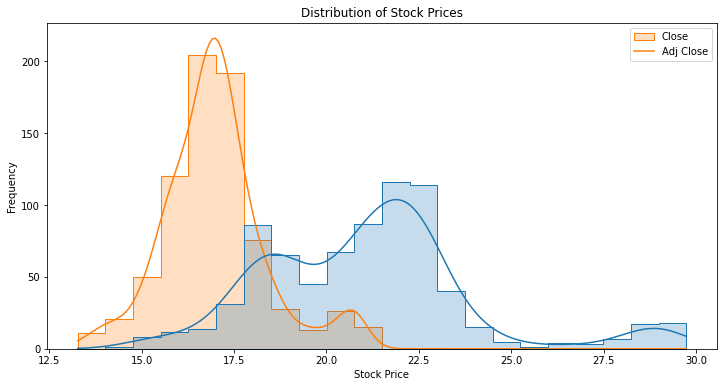

In [ ]:
# Plotting the distribution of stock prices (Close and Adj Close)
plt.figure(figsize=(12, 6))
sns.histplot(data[['Close', 'Adj Close']], kde=True, element='step')
plt.title('Distribution of Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.legend(['Close', 'Adj Close'])
plt.show()

## Feature Engineering
To make the data more suitable for customer segmentation, we can create some new features that could be more informative. For example, we can calculate moving averages to smooth out the data and better capture long-term trends.

In [ ]:
# Calculating 7-day and 30-day moving averages for the 'Close' price
data['7_day_MA_Close'] = data['Close'].rolling(window=7).mean()
data['30_day_MA_Close'] = data['Close'].rolling(window=30).mean()

# Calculating 7-day and 30-day moving averages for the 'Volume'
data['7_day_MA_Volume'] = data['Volume'].rolling(window=7).mean()
data['30_day_MA_Volume'] = data['Volume'].rolling(window=30).mean()

# Displaying the first few rows of the modified dataset
data.head()

Open 
 High 
 Low 
 Close 
 Adj Close 
 Volume 
 7_day_MA_Close 
 30_day_MA_Close 
 7_day_MA_Volume 
 30_day_MA_Volume 
 
 
 Date 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2020-01-02 
 29.577040 
 29.622356 
 29.237160 
 29.350452 
 20.629433 
 43165445 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2020-01-03 
 29.138973 
 29.607250 
 29.131420 
 29.501511 
 20.735603 
 36296666 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2020-01-06 
 29.448641 
 29.569487 
 29.320242 
 29.531721 
 20.756842 
 51229797 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2020-01-07 
 29.516617 
 29.682779 
 29.441088 
 29.645016 
 20.836468 
 37337462 
 NaN 
 NaN 
 NaN 
 NaN 
 
 
 2020-01-08 
 29.705439 
 29.871601 
 29.675226 
 29.735649 
 20.900173 
 53645832 
 NaN 
 NaN 
 NaN 
 NaN

## K-means Clustering
Now that we have prepared the data and created some new features, let's proceed with K-means clustering to segment the data into different customer groups.

In [ ]:
# Importing KMeans from sklearn
from sklearn.cluster import KMeans

# Dropping rows with NaN values
data_clustering = data.dropna()

# Selecting features for clustering
features = ['7_day_MA_Close', '30_day_MA_Close', '7_day_MA_Volume', '30_day_MA_Volume']
X = data_clustering[features]

# Fitting KMeans model
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

# Adding cluster labels to the original data
data_clustering['Cluster'] = kmeans.labels_

# Displaying the first few rows of data with cluster labels
data_clustering.head()

/home/hexuser/.cache/pypoetry/virtualenvs/python-kernel-OtKFaj5M-py3.9/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/tmp/ipykernel_12/3726270761.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clustering['Cluster'] = kmeans.labels_


Open 
 High 
 Low 
 Close 
 Adj Close 
 Volume 
 7_day_MA_Close 
 30_day_MA_Close 
 7_day_MA_Volume 
 30_day_MA_Volume 
 Cluster 
 
 
 Date 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2020-02-13 
 28.610271 
 29.025681 
 28.587612 
 28.935045 
 20.699434 
 32606942 
 28.869228 
 28.933786 
 3.452010e+07 
 4.403017e+07 
 0 
 
 
 2020-02-14 
 28.912388 
 29.055891 
 28.783989 
 28.889729 
 20.667015 
 36262904 
 28.916703 
 28.918429 
 3.504051e+07 
 4.380009e+07 
 0 
 
 
 2020-02-18 
 28.836859 
 28.942598 
 28.731117 
 28.897282 
 20.672424 
 32138644 
 28.897281 
 28.898288 
 3.467382e+07 
 4.366149e+07 
 0 
 
 
 2020-02-19 
 28.882175 
 29.191843 
 28.821753 
 29.033234 
 20.769676 
 29923989 
 28.896202 
 28.881672 
 3.418252e+07 
 4.295129e+07 
 0 
 
 
 2020-02-20 
 29.003021 
 29.206949 
 28.935045 
 29.161631 
 20.861530 
 35981156 
 28.925335 
 28.865559 
 3.581516e+07 
 4.290608e+07 
 0

## Generating Insights from Clusters
Now that we have segmented the data into clusters, let's analyze these clusters to understand the characteristics and behaviors of each segment. We'll start by looking at the statistical summary of each cluster.

In [ ]:
# Grouping the data by cluster and calculating the mean for each feature
cluster_summary = data_clustering.groupby('Cluster').mean()

# Displaying the statistical summary of each cluster
cluster_summary

Open 
 High 
 Low 
 Close 
 Adj Close 
 Volume 
 7_day_MA_Close 
 30_day_MA_Close 
 7_day_MA_Volume 
 30_day_MA_Volume 
 
 
 Cluster 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 0 
 20.753597 
 20.917438 
 20.578601 
 20.738663 
 16.937201 
 4.291059e+07 
 20.792966 
 20.864355 
 4.283065e+07 
 4.538892e+07 
 
 
 1 
 20.952521 
 21.194517 
 20.733187 
 20.955848 
 16.824231 
 6.226546e+07 
 20.946420 
 21.107590 
 6.119079e+07 
 6.233569e+07 
 
 
 2 
 19.854646 
 20.191134 
 19.531876 
 19.879000 
 16.206870 
 9.525092e+07 
 20.148239 
 20.998222 
 1.028595e+08 
 7.706689e+07

## Interpretation:
1. Cluster 0 seems to represent a more stable segment with moderate trading volume and close prices.
2. Cluster 1 shows higher trading volume and slightly higher close prices, indicating a more active or premium segment.
3. Cluster 2 has the highest trading volume but lower close prices, possibly representing a more volatile or riskier segment.

## Creating a Dashboard to Visualize Insights
To make the insights more accessible and interactive, we'll create a simple dashboard using matplotlib. This dashboard will include various plots to visualize the characteristics of each cluster.

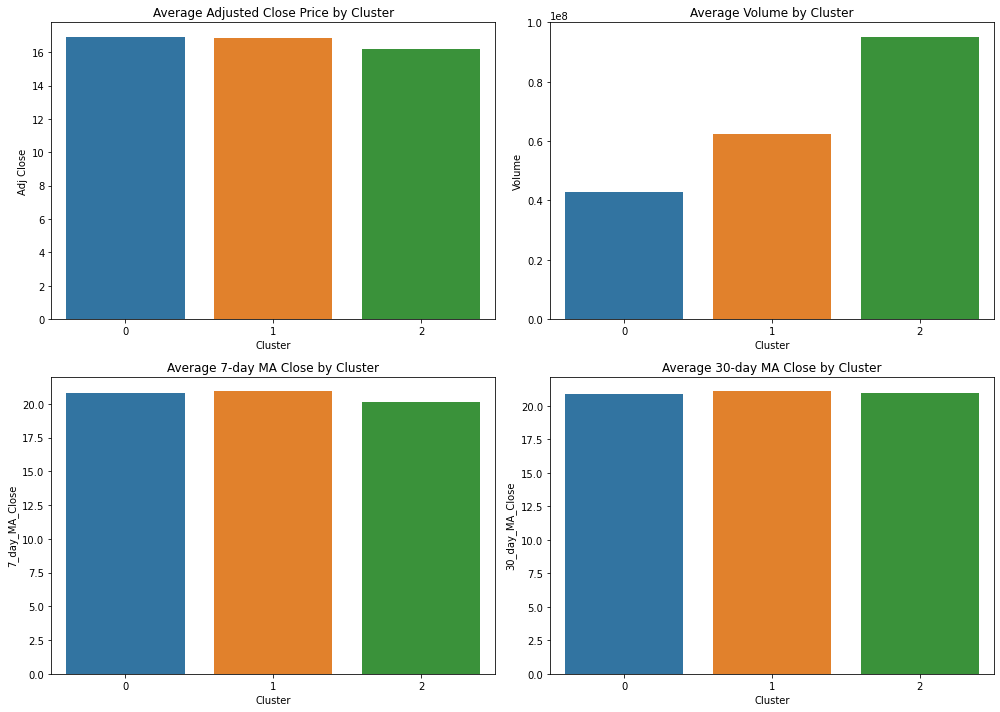

In [ ]:
# Creating a dashboard to visualize cluster insights
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plotting the average Adjusted Close Price for each cluster
sns.barplot(x=cluster_summary.index, y='Adj Close', data=cluster_summary, ax=axes[0, 0])
axes[0, 0].set_title('Average Adjusted Close Price by Cluster')

# Plotting the average Volume for each cluster
sns.barplot(x=cluster_summary.index, y='Volume', data=cluster_summary, ax=axes[0, 1])
axes[0, 1].set_title('Average Volume by Cluster')

# Plotting the average 7-day MA Close for each cluster
sns.barplot(x=cluster_summary.index, y='7_day_MA_Close', data=cluster_summary, ax=axes[1, 0])
axes[1, 0].set_title('Average 7-day MA Close by Cluster')

# Plotting the average 30-day MA Close for each cluster
sns.barplot(x=cluster_summary.index, y='30_day_MA_Close', data=cluster_summary, ax=axes[1, 1])
axes[1, 1].set_title('Average 30-day MA Close by Cluster')

plt.tight_layout()
plt.show()

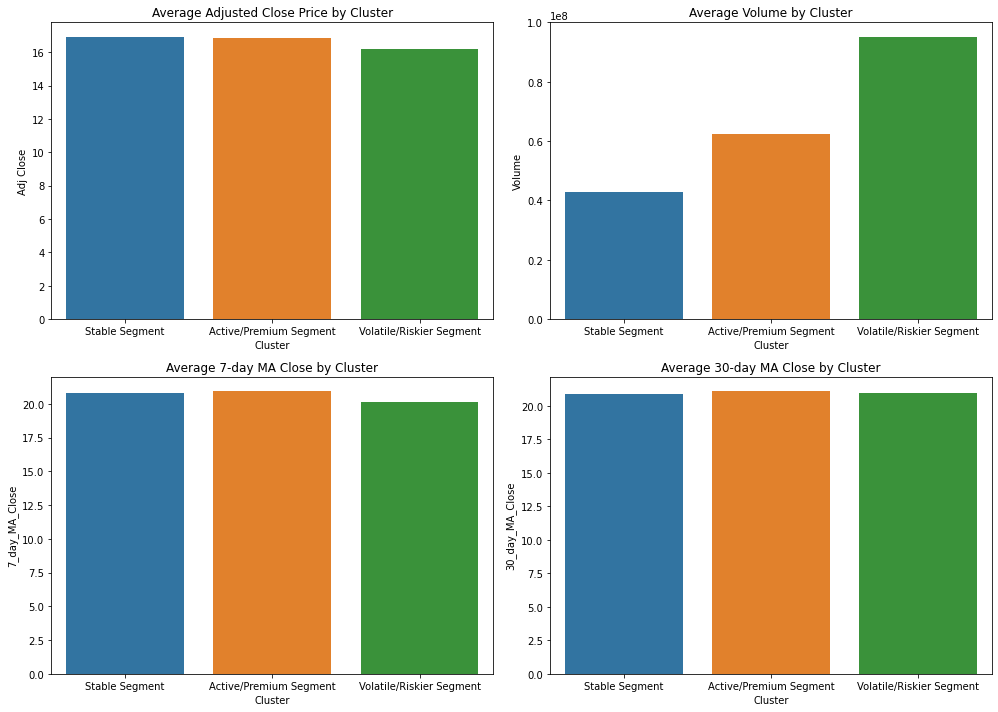

In [ ]:
# Renaming cluster labels for better interpretation
cluster_names = {
    0: 'Stable Segment',
    1: 'Active/Premium Segment',
    2: 'Volatile/Riskier Segment'
}
cluster_summary.rename(index=cluster_names, inplace=True)

# Creating a dashboard with renamed cluster labels
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plotting the average Adjusted Close Price for each cluster
sns.barplot(x=cluster_summary.index, y='Adj Close', data=cluster_summary, ax=axes[0, 0])
axes[0, 0].set_title('Average Adjusted Close Price by Cluster')

# Plotting the average Volume for each cluster
sns.barplot(x=cluster_summary.index, y='Volume', data=cluster_summary, ax=axes[0, 1])
axes[0, 1].set_title('Average Volume by Cluster')

# Plotting the average 7-day MA Close for each cluster
sns.barplot(x=cluster_summary.index, y='7_day_MA_Close', data=cluster_summary, ax=axes[1, 0])
axes[1, 0].set_title('Average 7-day MA Close by Cluster')

# Plotting the average 30-day MA Close for each cluster
sns.barplot(x=cluster_summary.index, y='30_day_MA_Close', data=cluster_summary, ax=axes[1, 1])
axes[1, 1].set_title('Average 30-day MA Close by Cluster')

plt.tight_layout()
plt.show()

## Enhancing Visualizations
To make the notebook more engaging and insightful, let's incorporate some advanced visualizations. We'll use radar charts to compare the features across different clusters, providing a more holistic view of each segment.

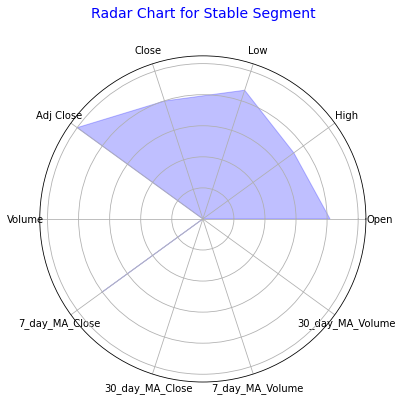

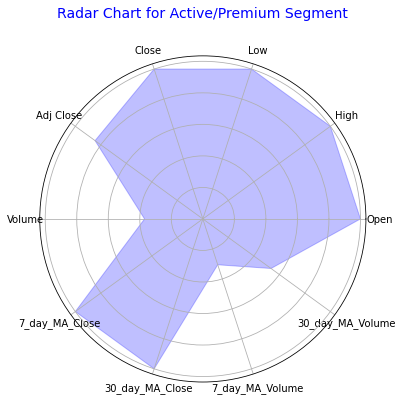

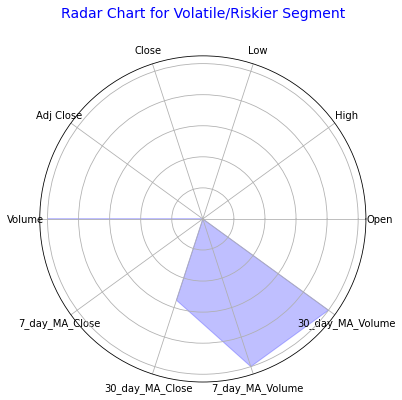

In [ ]:
from math import pi

# Function to create radar chart
def create_radar_chart(data, title):
    labels = data.index
    num_vars = len(labels)

    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, data.tolist() + data.tolist()[:1], color='blue', alpha=0.25)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    ax.set_title(title, size=14, color='blue', y=1.1)
    plt.show()

# Normalizing the data for radar chart
cluster_summary_normalized = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())

# Creating radar charts for each cluster
for cluster, row in cluster_summary_normalized.iterrows():
    create_radar_chart(row, f'Radar Chart for {cluster}')

## Conclustion and Business Insights:

1. Stable Segment: This group represents a stable customer base with moderate trading volume and stock prices. These could be long-term investors who are less reactive to market fluctuations. May require less frequent monitoring and customer service intervention. Suitable for conservative investment strategies focused on long-term growth.

2. Active/Premium Segment: This segment has higher trading volumes and slightly higher stock prices, indicating more active trading. These could be institutional investors or high-net-worth individuals. May require more robust infrastructure to handle higher trading volumes and customer service needs. Suitable for more aggressive strategies, possibly involving derivatives and short-term trading.

3. Volatile/Riskier Segment: This group has the highest trading volume but lower stock prices, indicating more speculative or high-frequency trading. Suitable for high-risk, high-reward strategies, possibly involving leverage. Could be targeted with risk management tools and tutorials on speculative trading.

Understanding the behavior of these segments can help in assessing the overall risk profile of the customer base and in making informed decisions on risk mitigation strategies. By understanding these segments, businesses can tailor their services, marketing strategies, and risk management protocols to better meet the needs of their diverse customer base.
